In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt


In [2]:

# Open the binary file
with open('../GW.dat', 'rb') as f:
    # Read the dimensions (ncol, nlev) - Fortran writes integers in 4 bytes by default
    ncol, nlev = np.fromfile(f, dtype=np.int32, count=2)
    print(f"Dimensions read from file: ncol={ncol}, nlev={nlev}")

    # Read array (two dimensions), Fortran order
    zm = np.fromfile(f, dtype=np.float64, count=ncol * nlev).reshape((ncol, nlev), order='F')
    # Read  array (two dimensions), Fortran order
    zi = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')
    ubm = np.fromfile(f, dtype=np.float64, count=ncol * (nlev) ).reshape((ncol, nlev), order='F')
    tau = np.fromfile(f, dtype=np.float64, count=ncol * (nlev+1) ).reshape((ncol, nlev+1), order='F')

# 


Dimensions read from file: ncol=48600, nlev=93


In [3]:
hfile =   '/glade/derecho/scratch/juliob/archive/ndg_Rdg00_c6455g3/atm/hist/ndg_Rdg00_c6455g3.cam.h2i.2014-01-15-00000.nc'
X=xr.open_dataset( hfile )

In [4]:
taucam=X.TAU1RDGBETAM.values
ubmcam=X.UBM1BETA.values


In [5]:

print(taucam.shape)
print(tau.shape)


(1, 94, 48600)
(48600, 94)


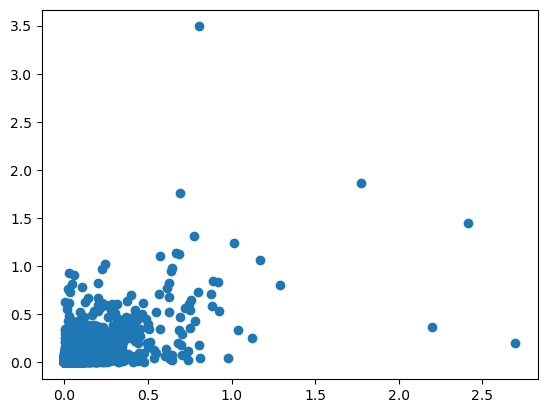

In [6]:
#plt.plot( taucam[0,40,:] )
#plt.plot( tau[:,40] )


plt.scatter( taucam[0,93,:] , tau[:,93] )
#plt.scatter( ubmcam[0,90,:] , ubm[:,90] )



(46400.0, 46600.0)

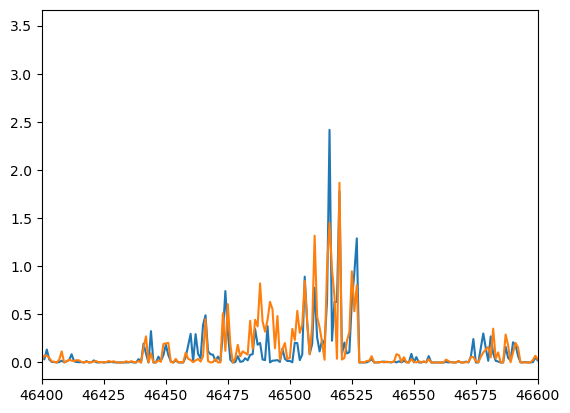

In [7]:
plt.plot( taucam[0,93,:] )
plt.plot( tau[:,93] )
plt.xlim((46400,46600))


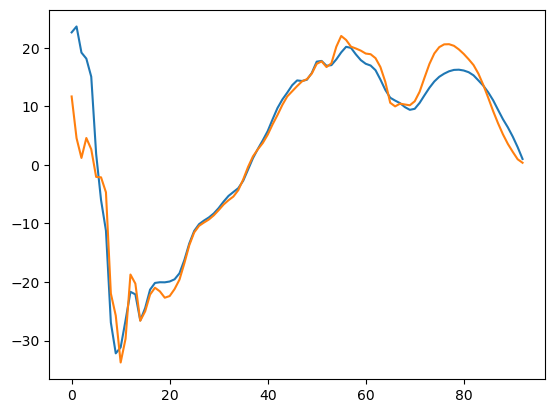

In [8]:
plt.plot( ubmcam[0,:,46525] )
plt.plot( ubm[46525,:] )
